In [1]:
'''
Sergio Barrientos Youtube Channel

This is the first video of a new series called 'Is Technical Analysis Complete BS?'
We will try different approaches common in technical analysis and test their worth against real financial data.

In this first video, we will start with the super basic SMA (simple moving average) strategy 
The strategy has two SMAs with different windows. When the short window SMA crosses over the long window SMA, it's supposedly a BUY signal
and viceversa.

We will use three different assets: SPY (SP500 ETF), AAPL (Apple Stock), and BTC (bitcoin). 

Quick disclaimer: I want to test these assets not because I particularly like or dislike any of them, but rather because of their trading 
volume in the financial markets. My personal opinion regarding cryptocurrencies has stayed the same so far, and I am on Warren Buffett's 
side of the aisle where I don't see any intrinsic value in BTC other than speculative returns.

Quick disclaimer 2: This case study was inspired from the book Python for Finance by Yves Hilpisch. You can check different strategies and
great financial applications with python in this book. This strategy can be found in Chapter 15

We will start by showing the idea behind our experiment, and then we will test the strategy with real world variables. These include the
following: transaction costs or fees, and risk profiles. We can't forget about bid/ask spreads and taxes which tend to change the picture
completely when using quantitative strategies. The data we will use doesn't provide us with that information, so you can
make a quick imaginative journey into how much harder it would be to consistenly make returns with those variables into the mix.

As with any type of backtesting, we will divide our data into a training sample (2000 to 2019) and a testing sample (2020 to 2025). Feel
free to use this script to do your own tests by changing the assets, assumptions, and time periods. If I have made a faulty assumption, 
you have a question or you think I am an ignorant that 'doesn't know anything about BTC', please let me know in the comment section of 
the video.

'''

"\nSergio Barrientos Youtube Channel\n\nThis is the first video of a new series called 'Is Technical Analysis Complete BS?'\nWe will try different approaches common in technical analysis and test their worth against real financial data.\n\nIn this first video, we will start with the super basic SMA (simple moving average) strategy \nThe strategy has two SMAs with different windows. When the short window SMA crosses over the long window SMA, it's supposedly a BUY signal\nand viceversa.\n\nWe will use three different assets: SPY (SP500 ETF), AAPL (Apple Stock), and BTC (bitcoin). \n\nQuick disclaimer: I want to test these assets not because I particularly like or dislike any of them, but rather because of their trading \nvolume in the financial markets. My personal opinion regarding cryptocurrencies has stayed the same so far, and I am on Warren Buffett's \nside of the aisle where I don't see any intrinsic value in BTC other than speculative returns.\n\nQuick disclaimer 2: This case stud

In [2]:
#Now let's start with the packages we will use in this case study 

#Financial data
import yfinance as yf 

#Data manipulation, cleaning, and transformation
import pandas as pd 

#Numerical calculations and computation
import numpy as np

#Data visualization
from pylab import mpl, plt

In [3]:
#We will start by importing the data of AAPL, SPY and BTC

#Periods
train_start_date = '2000-01-01'
train_end_date = '2019-12-31'

test_start_date = '2020-01-01'
test_end_date = '2025-01-01'

#AAPL
aapl_train_raw = yf.download('AAPL', start=train_start_date, end=train_end_date)
aapl_test_raw = yf.download('AAPL', start=test_start_date, end=test_end_date)

#SPY ETF
spy_train_raw = yf.download('SPY', start=train_start_date, end=train_end_date)
spy_test_raw = yf.download('SPY', start=test_start_date, end=test_end_date)

#BTC-USD
btc_train_raw = yf.download('BTC-USD', start=train_start_date, end=train_end_date)
btc_test_raw = yf.download('BTC-USD', start=test_start_date, end=test_end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#We will focus only in the close prices 
aapl_train_data = aapl_train_raw['Close'].dropna().copy()
aapl_test_data = aapl_test_raw['Close'].dropna().copy()

In [5]:
#Let's do some data exploration 
aapl_train_data
aapl_test_data

Ticker,AAPL
Date,
2020-01-02,72.716064
2020-01-03,72.009109
2020-01-06,72.582901
2020-01-07,72.241539
2020-01-08,73.403633
...,...
2024-12-24,257.916443
2024-12-26,258.735504
2024-12-27,255.309296


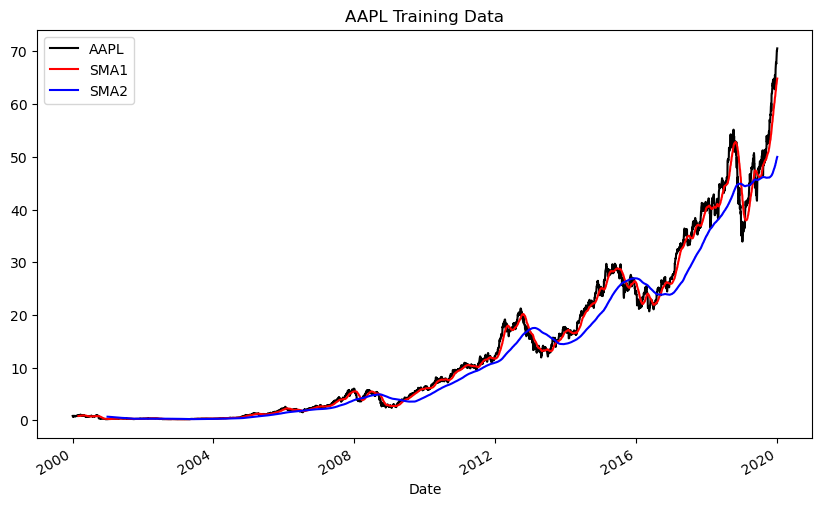

In [6]:
#Now let's visualize the essence of SMA strategy 

SMA1 = 42 #window of 42 periods (short window)
SMA2 = 252 #window of 252 periods (long window)

#Creating the moving averages with rolling() method
aapl_train_data['SMA1'] = aapl_train_data['AAPL'].rolling(SMA1).mean() #new column with SMA1
aapl_train_data['SMA2'] = aapl_train_data['AAPL'].rolling(SMA2).mean() #second column with SMA2


#Plotting the end result 
#Colors
colors = ['black', 'red', 'blue']  # Adjust as needed

#Plot
aapl_train_data.plot(figsize=(10, 6), color=colors)

#Legend and title
plt.title("AAPL Training Data")
plt.legend(aapl_train_data.columns)
plt.show()

In [7]:
#The different intercepts of the blue and red lines are BUY/SELL signals 
#Let's create our position dataframe
#LONG (+1) = when SMA1 > SMA2
#SHORT (-1) = when SMA1 < SMA2

aapl_train_data.dropna(inplace=True)
aapl_train_data['position'] = np.where(aapl_train_data['SMA1'] > aapl_train_data['SMA2'], 1, -1)
aapl_train_data.tail()

#If position is 1, it means you have to buy, and if you already bought it then it means you have to hold
#If position is -1, it means you have to short sell the asset in order to "gain" the inverse return of the underlying asset

Ticker,AAPL,SMA1,SMA2,position
Date,,,,
2019-12-23,68.757668,63.842537,49.460089,1
2019-12-24,68.823036,64.081293,49.594220,1
2019-12-26,70.188492,64.335319,49.723983,1
2019-12-27,70.161865,64.574515,49.854605,1
2019-12-30,70.578285,64.856730,49.986804,1


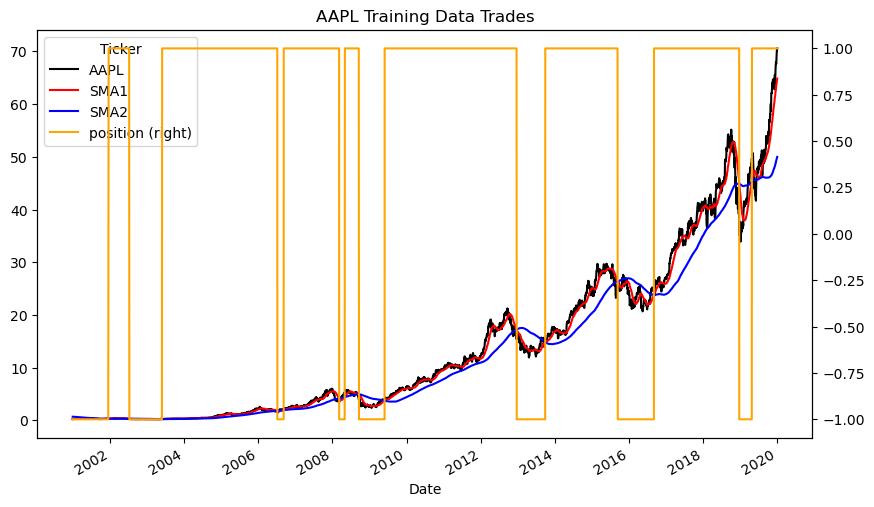

In [8]:
#Let's visualize the trades
ax_trades = aapl_train_data.plot(secondary_y='position', figsize=(10,6), color = ['black', 'red', 'blue','orange'])
plt.title("AAPL Training Data Trades")
plt.show()

In [9]:
#Now let's compare this initial oversimplified strategy with holding the asset from start to end

#Calculate the returns
#Return using logarithms because of ease of addition
aapl_train_data['returns'] = np.log(aapl_train_data['AAPL']/aapl_train_data['AAPL'].shift(1))

#Strategy consists of getting the return of the position you had yesterday. If the position is a BUY yesterday, then you earn today's
#return in exchange. We do this to avoid lookahead bias.
aapl_train_data['strategy'] = aapl_train_data['position'].shift(1) * aapl_train_data['returns']

#Let's compare the return from the strategy and the return from holding the asset
aapl_train_data.dropna(inplace=True)
np.exp(aapl_train_data[['returns', 'strategy']].sum())

#It's pretty obvious that the strategy has underperformed the simple buy and hold of AAPL stock


Ticker
returns     315.333344
strategy     22.624997
dtype: float64

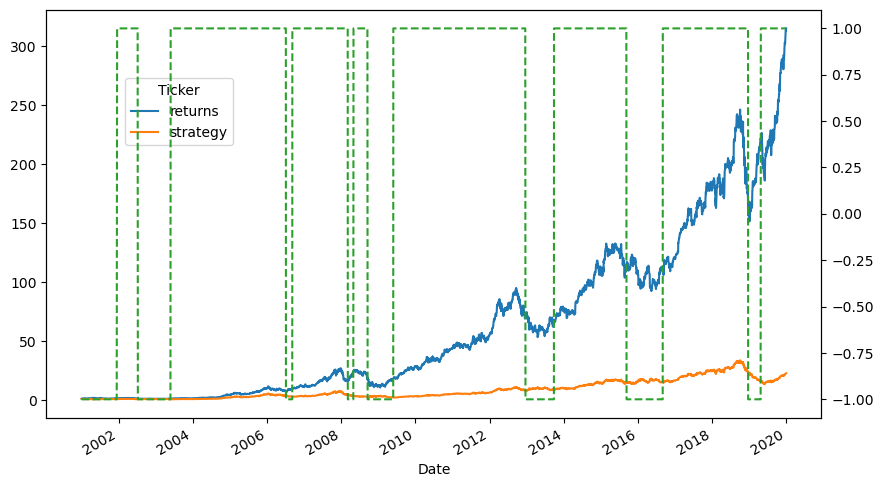

In [10]:
#Let's visualize one against the other

#Overall performance
ax_aapl = aapl_train_data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6)) #this will create a line chart
aapl_train_data['position'].plot(ax=ax_aapl, secondary_y='position', style='--')
ax_aapl.get_legend().set_bbox_to_anchor((0.25, 0.85))


In [11]:
#Now you can fairly argue that my choice of the periods could be wrong, so let's iterate between different windows
#We will find the best window and then compare the strategy for each asset vs. buying and holding the asset over the long-term

#Iterative package
from itertools import product

#Ranges of different short and long windows
sma1 = range(20,61,4) #From 20 to 61 with steps of 4 (20,24,28,...)
sma2 = range(180,281,10) #From 180 to 281 with steps of 10 (180,190,200...)

#Empty dataframe for results
results = pd.DataFrame()

for SMA1, SMA2 in product(sma1, sma2):
    data = aapl_train_raw.copy() #copy to avoid changing the original raw file
    data = data['Close'].dropna() #dropping NA rows
    data['returns'] = np.log(data['AAPL']/data['AAPL'].shift(1)) #logreturns for easy addition
    data['SMA1'] = data['AAPL'].rolling(SMA1).mean() #sma1
    data['SMA2'] = data['AAPL'].rolling(SMA2).mean() #sma2
    data.dropna(inplace=True) #dropping NA values for rolling windows without data
    data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) #position column (-1 means short selling the asset)
    data['strategy'] = data['position'].shift(1) * data['returns'] #return of the strategy for each day (shift because of bias)
    
    data.dropna(inplace=True)
    perf = np.exp(data[[
        'returns', 'strategy'
    ]].sum()) #performance from strategy and the underlying asset
    
    results = pd.concat([
    results, 
    pd.DataFrame(
        {
            'SMA1': SMA1, 
            'SMA2': SMA2,
            'MARKET': perf['returns'],
            'STRATEGY': perf['strategy'],
            'OUT': perf['strategy'] - perf['returns']
        }, index=[0]
    ) #merging all the different combinations of SMA1 and SMA2
    ], ignore_index=True)

#The winner strategy is...
results.sort_values('OUT', ascending=False).head(1)

#SMA1 = 36 and SMA2 = 180
#And by winner, this is actually the best between the worst

,SMA1,SMA2,MARKET,STRATEGY,OUT
44,36,180,77.330612,63.412438,-13.918174



Best combination: Short Window = 20.0, Long Window = 240.0


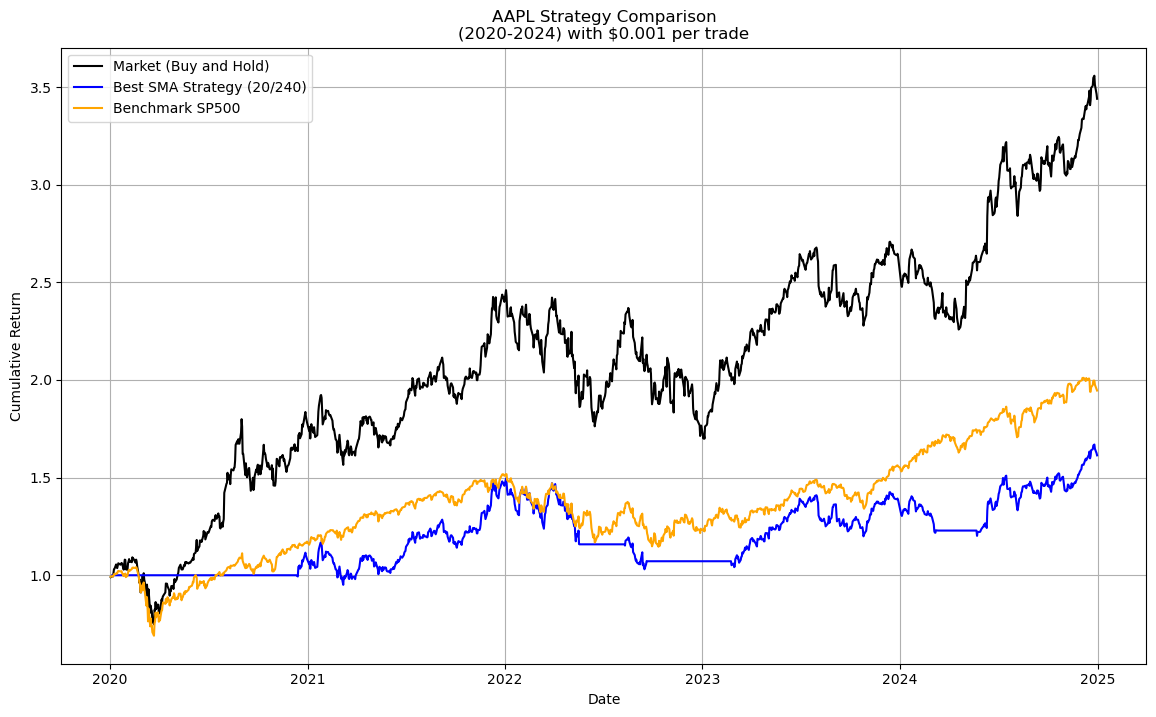

In [12]:
#This strategy is still in fairy land because we haven't implemented transaction fees, taxes, risk profile, and bid/ask spreads
#Let's implement the first two into our model and run the script for all three assets

#First AAPL

#Parameters
transaction_cost = 0.001  # cost per trade in dollars on average (most brokers now offer commission free trades)

#SMA ranges to test
short_windows = range(20, 61, 5)  # 20, 25, 30, ..., 60
long_windows = range(100, 251, 10)  # 100, 110, ..., 250

#Download Data
data = aapl_train_raw.copy()
data = data[['Close']].rename(columns={'Close': 'Price'})
data.dropna(inplace=True)

#Calculate Returns
data['returns'] = np.log(data['Price'] / data['Price'].shift(1))

#Optimization Loop
results = []

for short_w, long_w in product(short_windows, long_windows):
    if short_w >= long_w:  #only test meaningful combinations
        continue

    temp = data.copy()
    temp['SMA_short'] = temp['Price'].rolling(window=short_w).mean()
    temp['SMA_long'] = temp['Price'].rolling(window=long_w).mean()
    temp['position_SMA'] = np.where(temp['SMA_short'] > temp['SMA_long'], 1, 0) #because we will not short sell but rather just sell
    temp['position_SMA'] = temp['position_SMA'].shift(1)
    temp['trade_SMA'] = temp['position_SMA'].diff().abs()
    temp['strategy_SMA'] = temp['position_SMA'] * temp['returns']
    temp['strategy_SMA'] -= transaction_cost * temp['trade_SMA']

    #Cumulative return
    cumulative_SMA = temp['strategy_SMA'].cumsum().apply(np.exp).iloc[-1]

    #Save results
    results.append({
        'Short_Window': short_w,
        'Long_Window': long_w,
        'Final_SMA_Return': cumulative_SMA
    })

#Results DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values('Final_SMA_Return', ascending=False, inplace=True)

#Best Strategy
best_short = results_df.iloc[0]['Short_Window']
best_long = results_df.iloc[0]['Long_Window']

print(f"\nBest combination: Short Window = {best_short}, Long Window = {best_long}")

#Plot the best strategy
#Recalculate best strategy
data_test = aapl_test_raw.copy()
data_test = data_test[['Close']].rename(columns={'Close': 'Price'})
data_test.dropna(inplace=True)

#Calculate the variables with the best SMA combination
data_test['returns'] = np.log(data_test['Price'] / data_test['Price'].shift(1))
data_test['SMA_short_best'] = data_test['Price'].rolling(window=int(best_short)).mean()
data_test['SMA_long_best'] = data_test['Price'].rolling(window=int(best_long)).mean()
data_test['position_best'] = np.where(data_test['SMA_short_best'] > data_test['SMA_long_best'], 1, 0) #we will not short sell

#Make sure that instead of short selling, we are not buying but holding our neutral position until next buy signal
data_test['position_best'] = data_test['position_best'].shift(1)
data_test['trade_best'] = data_test['position_best'].diff().abs()

#We adjust the return to consider transaction costs (fees)
data_test['strategy_best'] = data_test['position_best'] * data_test['returns']
data_test['strategy_best'] -= transaction_cost * data_test['trade_best']

#Cumulative results
data_test['cumulative_market'] = data_test['returns'].cumsum().apply(np.exp)
data_test['cumulative_best'] = data_test['strategy_best'].cumsum().apply(np.exp)

#SP500 benchmark results
benchmark_test = spy_test_raw.copy()
benchmark_test = benchmark_test[['Close']].rename(columns={'Close': 'Price'})
benchmark_test.dropna(inplace=True)
benchmark_test['returns'] = np.log(benchmark_test['Price'] / benchmark_test['Price'].shift(1))
benchmark_test['cumulative_spy'] = benchmark_test['returns'].cumsum().apply(np.exp)

#Figure size
plt.figure(figsize=(14,8))
#Underlying asset plot
plt.plot(data_test['cumulative_market'], label='Market (Buy and Hold)', color='black')
#Strategy plot
plt.plot(data_test['cumulative_best'], label=f'Best SMA Strategy ({int(best_short)}/{int(best_long)})', color='blue')
#Benchmark plot
plt.plot(benchmark_test['cumulative_spy'], label='Benchmark SP500', color = 'orange')
#Title
plt.title(f'{'AAPL'} Strategy Comparison\n(2020-2024) with ${transaction_cost:.3f} per trade')
#Label x axis
plt.xlabel('Date')
#Label y axis
plt.ylabel('Cumulative Return')
#Legend
plt.legend()
#Grid
plt.grid()
#Show final visualization
plt.show()



Best combination: Short Window = 25.0, Long Window = 220.0


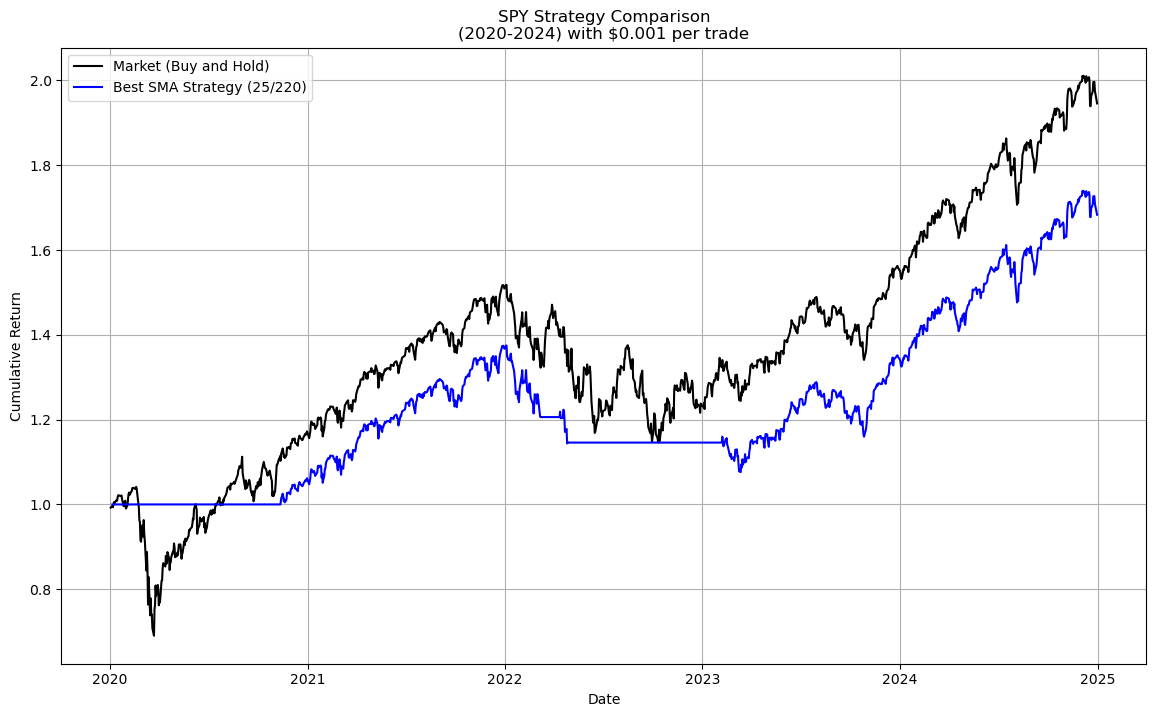

In [13]:
#Now SPY

#Parameters
transaction_cost = 0.001  #cost per trade in dollars on average (most brokers now offer commission free trades)

#SMA ranges to test
short_windows = range(20, 61, 5)  #20, 25, 30, ..., 60
long_windows = range(100, 251, 10)  #100, 110, ..., 250

#Download Data
spy_data = spy_train_raw.copy()
spy_data = spy_data[['Close']].rename(columns={'Close': 'Price'})
spy_data.dropna(inplace=True)

#Calculate Returns
spy_data['returns'] = np.log(spy_data['Price'] / spy_data['Price'].shift(1))

#Optimization Loop
spy_results = []

for short_w, long_w in product(short_windows, long_windows):
    if short_w >= long_w:  #only test meaningful combinations
        continue

    temp = spy_data.copy()
    temp['SMA_short'] = temp['Price'].rolling(window=short_w).mean()
    temp['SMA_long'] = temp['Price'].rolling(window=long_w).mean()
    temp['position_SMA'] = np.where(temp['SMA_short'] > temp['SMA_long'], 1, 0) #because we will not short sell but rather just sell
    temp['position_SMA'] = temp['position_SMA'].shift(1)
    temp['trade_SMA'] = temp['position_SMA'].diff().abs()
    temp['strategy_SMA'] = temp['position_SMA'] * temp['returns']
    temp['strategy_SMA'] -= transaction_cost * temp['trade_SMA']

    #Cumulative return
    cumulative_SMA = temp['strategy_SMA'].cumsum().apply(np.exp).iloc[-1]

    #Save results
    spy_results.append({
        'Short_Window': short_w,
        'Long_Window': long_w,
        'Final_SMA_Return': cumulative_SMA
    })

#Results DataFrame
spy_results_df = pd.DataFrame(spy_results)
spy_results_df.sort_values('Final_SMA_Return', ascending=False, inplace=True)

#Best Strategy
best_short = spy_results_df.iloc[0]['Short_Window']
best_long = spy_results_df.iloc[0]['Long_Window']

print(f"\nBest combination: Short Window = {best_short}, Long Window = {best_long}")

#Plot the best strategy
# Recalculate best strategy
spy_data_test = spy_test_raw.copy()
spy_data_test = spy_data_test[['Close']].rename(columns={'Close': 'Price'})
spy_data_test.dropna(inplace=True)

spy_data_test['returns'] = np.log(spy_data_test['Price'] / spy_data_test['Price'].shift(1))
spy_data_test['SMA_short_best'] = spy_data_test['Price'].rolling(window=int(best_short)).mean()
spy_data_test['SMA_long_best'] = spy_data_test['Price'].rolling(window=int(best_long)).mean()
spy_data_test['position_best'] = np.where(spy_data_test['SMA_short_best'] > spy_data_test['SMA_long_best'], 1, 0) #we will not short sell
spy_data_test['position_best'] = spy_data_test['position_best'].shift(1)
spy_data_test['trade_best'] = spy_data_test['position_best'].diff().abs()
spy_data_test['strategy_best'] = spy_data_test['position_best'] * spy_data_test['returns']
spy_data_test['strategy_best'] -= transaction_cost * spy_data_test['trade_best']

spy_data_test['cumulative_market'] = spy_data_test['returns'].cumsum().apply(np.exp)
spy_data_test['cumulative_best'] = spy_data_test['strategy_best'].cumsum().apply(np.exp)

plt.figure(figsize=(14,8))
plt.plot(spy_data_test['cumulative_market'], label='Market (Buy and Hold)', color='black')
plt.plot(spy_data_test['cumulative_best'], label=f'Best SMA Strategy ({int(best_short)}/{int(best_long)})', color='blue')
plt.title(f'{'SPY'} Strategy Comparison\n(2020-2024) with ${transaction_cost:.3f} per trade')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()


Best combination: Short Window = 30.0, Long Window = 150.0


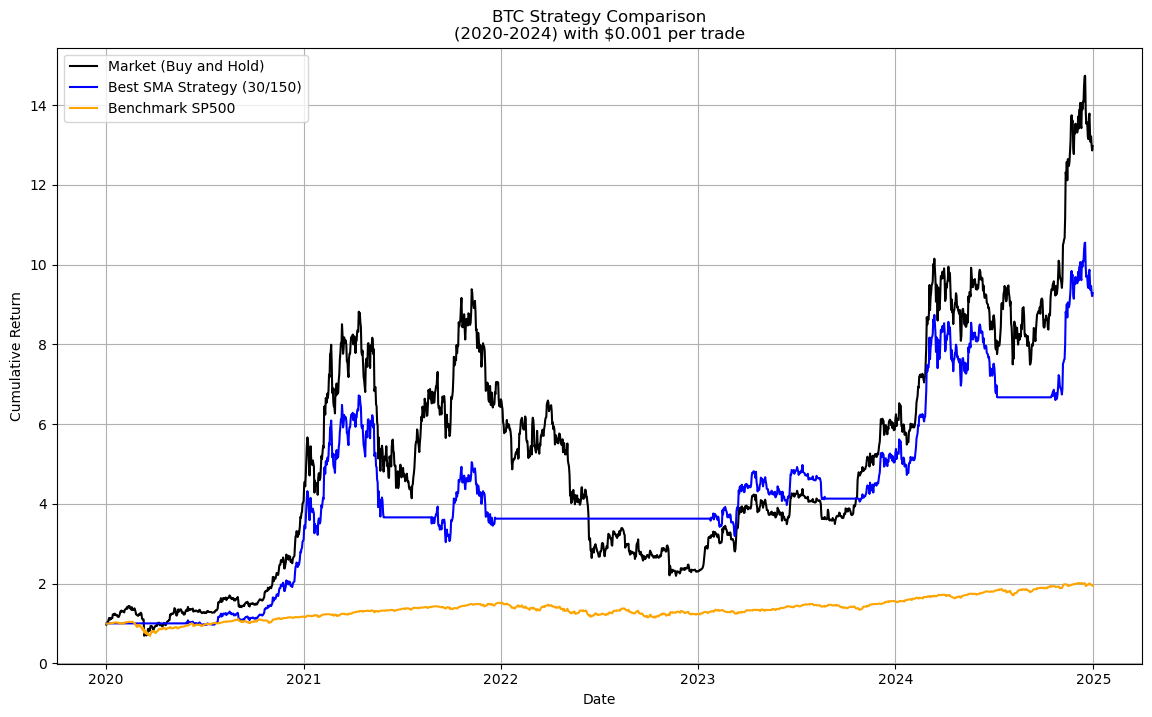

In [14]:
#Finally bitcoin

#Parameters
transaction_cost = 0.001  #cost per trade in dollars on average (most brokers now offer commission free trades)

#SMA ranges to test
short_windows = range(20, 61, 5)  #20, 25, 30, ..., 60
long_windows = range(100, 251, 10)  #100, 110, ..., 250

#Download Data
btc_data = btc_train_raw.copy()
btc_data = btc_data[['Close']].rename(columns={'Close': 'Price'})
btc_data.dropna(inplace=True)

#Calculate Returns
btc_data['returns'] = np.log(btc_data['Price'] / btc_data['Price'].shift(1))

#Optimization Loop
btc_results = []

for short_w, long_w in product(short_windows, long_windows):
    if short_w >= long_w:  #Only test meaningful combinations
        continue

    temp = btc_data.copy()
    temp['SMA_short'] = temp['Price'].rolling(window=short_w).mean()
    temp['SMA_long'] = temp['Price'].rolling(window=long_w).mean()
    temp['position_SMA'] = np.where(temp['SMA_short'] > temp['SMA_long'], 1, 0) #because we will not short sell but rather just sell
    temp['position_SMA'] = temp['position_SMA'].shift(1)
    temp['trade_SMA'] = temp['position_SMA'].diff().abs()
    temp['strategy_SMA'] = temp['position_SMA'] * temp['returns']
    temp['strategy_SMA'] -= transaction_cost * temp['trade_SMA']

    #Cumulative return
    cumulative_SMA = temp['strategy_SMA'].cumsum().apply(np.exp).iloc[-1]

    #Save results
    btc_results.append({
        'Short_Window': short_w,
        'Long_Window': long_w,
        'Final_SMA_Return': cumulative_SMA
    })

#Results DataFrame
btc_results_df = pd.DataFrame(btc_results)
btc_results_df.sort_values('Final_SMA_Return', ascending=False, inplace=True)

#Best Strategy
best_short = btc_results_df.iloc[0]['Short_Window']
best_long = btc_results_df.iloc[0]['Long_Window']

print(f"\nBest combination: Short Window = {best_short}, Long Window = {best_long}")

#Plot the best strategy
#Recalculate best strategy
btc_data_test = btc_test_raw.copy()
btc_data_test = btc_data_test[['Close']].rename(columns={'Close': 'Price'})
btc_data_test.dropna(inplace=True)

btc_data_test['returns'] = np.log(btc_data_test['Price'] / btc_data_test['Price'].shift(1))
btc_data_test['SMA_short_best'] = btc_data_test['Price'].rolling(window=int(best_short)).mean()
btc_data_test['SMA_long_best'] = btc_data_test['Price'].rolling(window=int(best_long)).mean()
btc_data_test['position_best'] = np.where(btc_data_test['SMA_short_best'] > btc_data_test['SMA_long_best'], 1, 0) #we will not short sell
btc_data_test['position_best'] = btc_data_test['position_best'].shift(1)
btc_data_test['trade_best'] = btc_data_test['position_best'].diff().abs()
btc_data_test['strategy_best'] = btc_data_test['position_best'] * btc_data_test['returns']
btc_data_test['strategy_best'] -= transaction_cost * btc_data_test['trade_best']


benchmark_test = spy_test_raw.copy()
benchmark_test = benchmark_test[['Close']].rename(columns={'Close': 'Price'})
benchmark_test.dropna(inplace=True)
benchmark_test['returns'] = np.log(benchmark_test['Price'] / benchmark_test['Price'].shift(1))
benchmark_test['cumulative_spy'] = benchmark_test['returns'].cumsum().apply(np.exp)

btc_data_test['cumulative_market'] = btc_data_test['returns'].cumsum().apply(np.exp)
btc_data_test['cumulative_best'] = btc_data_test['strategy_best'].cumsum().apply(np.exp)

plt.figure(figsize=(14,8))
plt.plot(btc_data_test['cumulative_market'], label='Market (Buy and Hold)', color='black')
plt.plot(btc_data_test['cumulative_best'], label=f'Best SMA Strategy ({int(best_short)}/{int(best_long)})', color='blue')
plt.plot(benchmark_test['cumulative_spy'], label='Benchmark SP500', color = 'orange')
plt.title(f'{'BTC'} Strategy Comparison\n(2020-2024) with ${transaction_cost:.3f} per trade')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [15]:
'''
In conclusion, our first experiment on technical analysis has strong evidence that it's truly BS. It's BS in terms of using it to trade
and trying to actively beat the market, but we are forgetting that an SMA is not a PREDICTOR but rather an INDICATOR.

It indicates something about the market, and it should be used in that way. There are no issues in looking at how the SMAs are moving, 
just don't trade (at all if possible) based on how these lines move or cross with each other. 

Use it like a lighthouse of what the market (people) is feeling in any particular moment. 

Test this model with other assets, assumptions, and timeframes (we used daily prices). Let me know if SMA trading is not BS 
in some scenarios.

Have a great day. See you in the next one. 

Chau chau 

With love,
Sergio Barrientos' Team 
'''


"\nIn conclusion, our first experiment on technical analysis has strong evidence that it's truly BS. It's BS in terms of using it to trade\nand trying to actively beat the market, but we are forgetting that an SMA is not a PREDICTOR but rather an INDICATOR.\n\nIt indicates something about the market, and it should be used in that way. There are no issues in looking at how the SMAs are moving, \njust don't trade (at all if possible) based on how these lines move or cross with each other. \n\nUse it like a lighthouse of what the market (people) is feeling in any particular moment. \n\nTest this model with other assets, assumptions, and timeframes (we used daily prices). Let me know if SMA trading is not BS \nin some scenarios.\n\nHave a great day. See you in the next one. \n\nChau chau \n\nWith love,\nSergio Barrientos' Team \n"